# Include

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Traitement des données

In [2]:
#Récupération des données pour l'entrainement
df_for_train = pd.read_csv('../Donnees/5yDataTrain.csv')

#Récupération des données pour le test
df_for_test = pd.read_csv('../Donnees/1yDataTest.csv')

In [3]:
# Création du dataframe de train avec deux lignes pour chaque match
# Une ligne avec les statistiques du vainqueur et une avec celles du perdant

def create_match_rows_train(df):

    columns = ['player_rank', 'player_age', 'player_ace', 'player_df', 'player_svpt', 
               'player_1stIn', 'player_1stWon', 'player_2ndWon', 'player_SvGms', 
               'player_bpSaved', 'player_bpFaced', 'result']

    # DataFrame pour les statistiques du vainqueur
    winner_df = pd.DataFrame(columns = columns)
    winner_df['player_rank'] = df['winner_rank']
    winner_df['player_age'] = df['winner_age']
    winner_df['player_ace'] = df['w_ace']
    winner_df['player_df'] = df['w_df']
    winner_df['player_svpt'] = df['w_svpt']
    winner_df['player_1stIn'] = df['w_1stIn']
    winner_df['player_1stWon'] = df['w_1stWon']
    winner_df['player_2ndWon'] = df['w_2ndWon']
    winner_df['player_SvGms'] = df['w_SvGms']
    winner_df['player_bpSaved'] = df['w_bpSaved']
    winner_df['player_bpFaced'] = df['w_bpFaced']
    winner_df['result'] = 1  # Le joueur est un gagnant

    # DataFrame pour les statistiques du perdant
    loser_df = pd.DataFrame(columns = columns)
    loser_df['player_rank'] = df['loser_rank']
    loser_df['player_age'] = df['loser_age']
    loser_df['player_ace'] = df['l_ace']
    loser_df['player_df'] = df['l_df']
    loser_df['player_svpt'] = df['l_svpt']
    loser_df['player_1stIn'] = df['l_1stIn']
    loser_df['player_1stWon'] = df['l_1stWon']
    loser_df['player_2ndWon'] = df['l_2ndWon']
    loser_df['player_SvGms'] = df['l_SvGms']
    loser_df['player_bpSaved'] = df['l_bpSaved']
    loser_df['player_bpFaced'] = df['l_bpFaced']
    loser_df['result'] = 0  # Le joueur est un perdant

    # Concaténer les deux DataFrames
    final_df = pd.concat([winner_df, loser_df])
    final_df.reset_index(drop=True, inplace=True)
    return final_df

# Création du dataframe de test avec deux lignes pour chaque match
# Une ligne avec les statistiques du vainqueur et une avec celles du perdant mais la colonne result est vide

def create_match_rows_test(df):

    columns = ['player_rank', 'player_age', 'player_ace', 'player_df', 'player_svpt', 
               'player_1stIn', 'player_1stWon', 'player_2ndWon', 'player_SvGms', 
               'player_bpSaved', 'player_bpFaced', 'result']

    # DataFrame pour les statistiques du joueur 1 (vainqueur dans le dataset d'entraînement)
    player1_df = pd.DataFrame(columns = columns)
    player1_df['player_rank'] = df['winner_rank']
    player1_df['player_age'] = df['winner_age']
    player1_df['player_ace'] = df['w_ace']
    player1_df['player_df'] = df['w_df']
    player1_df['player_svpt'] = df['w_svpt']
    player1_df['player_1stIn'] = df['w_1stIn']
    player1_df['player_1stWon'] = df['w_1stWon']
    player1_df['player_2ndWon'] = df['w_2ndWon']
    player1_df['player_SvGms'] = df['w_SvGms']
    player1_df['player_bpSaved'] = df['w_bpSaved']
    player1_df['player_bpFaced'] = df['w_bpFaced']
    player1_df['result'] = None  # Pas de résultat pour les données de test

    # DataFrame pour les statistiques du joueur 2 (perdant dans le dataset d'entraînement)
    player2_df = pd.DataFrame(columns = columns)
    player2_df['player_rank'] = df['loser_rank']
    player2_df['player_age'] = df['loser_age']
    player2_df['player_ace'] = df['l_ace']
    player2_df['player_df'] = df['l_df']
    player2_df['player_svpt'] = df['l_svpt']
    player2_df['player_1stIn'] = df['l_1stIn']
    player2_df['player_1stWon'] = df['l_1stWon']
    player2_df['player_2ndWon'] = df['l_2ndWon']
    player2_df['player_SvGms'] = df['l_SvGms']
    player2_df['player_bpSaved'] = df['l_bpSaved']
    player2_df['player_bpFaced'] = df['l_bpFaced']
    player2_df['result'] = None  # Pas de résultat pour les données de test

    # Concaténer les deux DataFrames
    final_df = pd.concat([player1_df, player2_df])
    final_df.reset_index(drop=True, inplace=True)

    return final_df

In [4]:
#Création du dataframe pour le train et récupération de ses informations principales
dfTrain = create_match_rows_train(df_for_train)
print(dfTrain.info())
print(dfTrain.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_rank     28483 non-null  float64
 1   player_age      28665 non-null  float64
 2   player_ace      28678 non-null  float64
 3   player_df       28678 non-null  float64
 4   player_svpt     28678 non-null  float64
 5   player_1stIn    28678 non-null  float64
 6   player_1stWon   28678 non-null  float64
 7   player_2ndWon   28678 non-null  float64
 8   player_SvGms    28678 non-null  float64
 9   player_bpSaved  28678 non-null  float64
 10  player_bpFaced  28678 non-null  float64
 11  result          28678 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 2.6 MB
None
   player_rank  player_age  player_ace  player_df  player_svpt  player_1stIn  \
0         47.0        25.6         9.0        2.0         82.0          49.0   
1         54.0        21.2         5.0       

In [5]:
#Création du dataframe pour le test et récupération de ses informations principales
dfTest = create_match_rows_test(df_for_test)
print(dfTest.info())
print(dfTest.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_rank     2799 non-null   float64
 1   player_age      2830 non-null   float64
 2   player_ace      2834 non-null   float64
 3   player_df       2834 non-null   float64
 4   player_svpt     2834 non-null   float64
 5   player_1stIn    2834 non-null   float64
 6   player_1stWon   2834 non-null   float64
 7   player_2ndWon   2834 non-null   float64
 8   player_SvGms    2834 non-null   float64
 9   player_bpSaved  2834 non-null   float64
 10  player_bpFaced  2834 non-null   float64
 11  result          0 non-null      object 
dtypes: float64(11), object(1)
memory usage: 265.8+ KB
None
   player_rank  player_age  player_ace  player_df  player_svpt  player_1stIn  \
0         14.0        32.6         8.0        2.0         74.0          52.0   
1          8.0        20.6         7.0     

# Statistiques

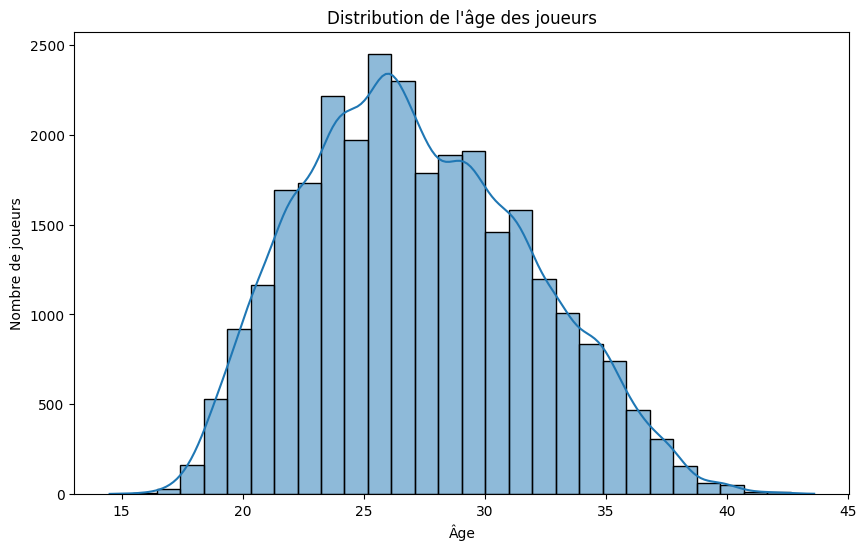

In [16]:
# Création d'un histogramme pour la distribution de l'âge des joueurs
plt.figure(figsize=(10, 6))
sns.histplot(dfTrain['player_age'], bins=30, kde=True)

plt.title('Distribution de l\'âge des joueurs')
plt.xlabel('Âge')
plt.ylabel('Nombre de joueurs')

plt.show()

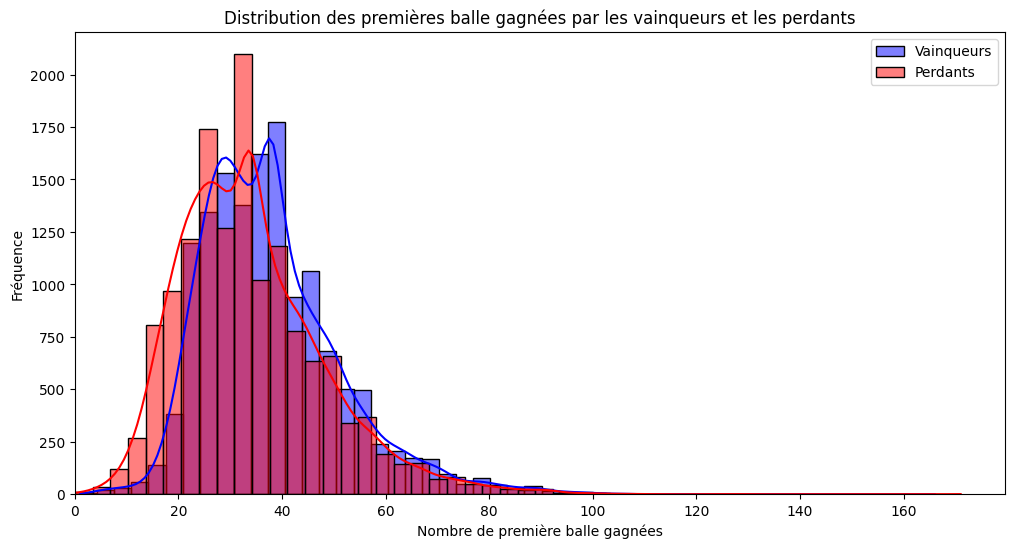

In [25]:
# Création d'un histogramme pour la distribution des aces des vainqueurs et des perdants
plt.figure(figsize=(12, 6))
sns.histplot(data=dfTrain[dfTrain['result'] == 1], x='player_1stWon', kde=True, label='Vainqueurs', color='blue', bins=50)
sns.histplot(data=dfTrain[dfTrain['result'] == 0], x='player_1stWon', kde=True, label='Perdants', color='red', bins=50)

plt.legend()
plt.title('Distribution des premières balle gagnées par les vainqueurs et les perdants')
plt.xlabel('Nombre de première balle gagnées')
plt.ylabel('Fréquence')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

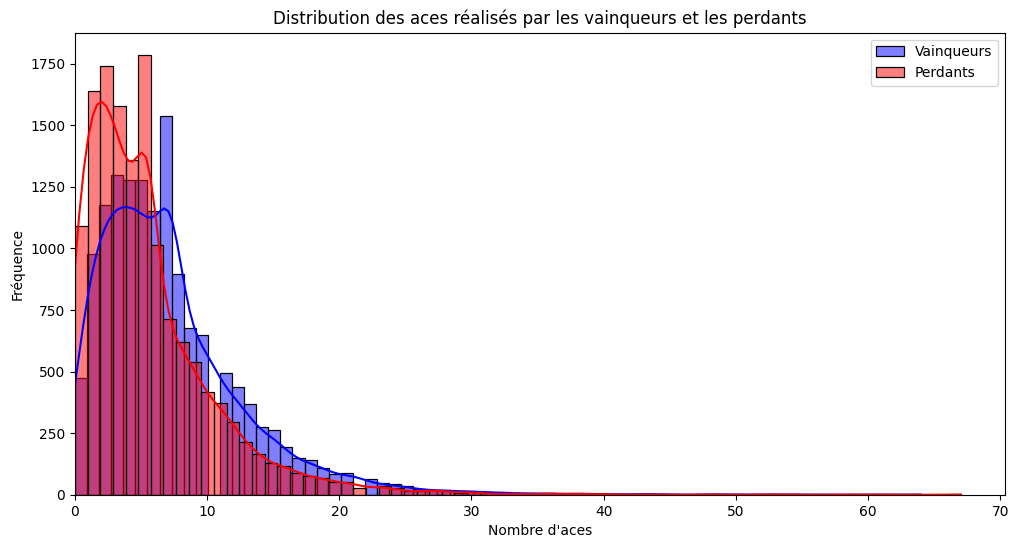

In [26]:
# Création d'un histogramme pour la distribution des aces des vainqueurs et des perdants
plt.figure(figsize=(12, 6))
sns.histplot(data=dfTrain[dfTrain['result'] == 1], x='player_ace', kde=True, label='Vainqueurs', color='blue', bins=70)
sns.histplot(data=dfTrain[dfTrain['result'] == 0], x='player_ace', kde=True, label='Perdants', color='red', bins=70)

plt.legend()
plt.title('Distribution des aces réalisés par les vainqueurs et les perdants')
plt.xlabel('Nombre d\'aces')
plt.ylabel('Fréquence')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

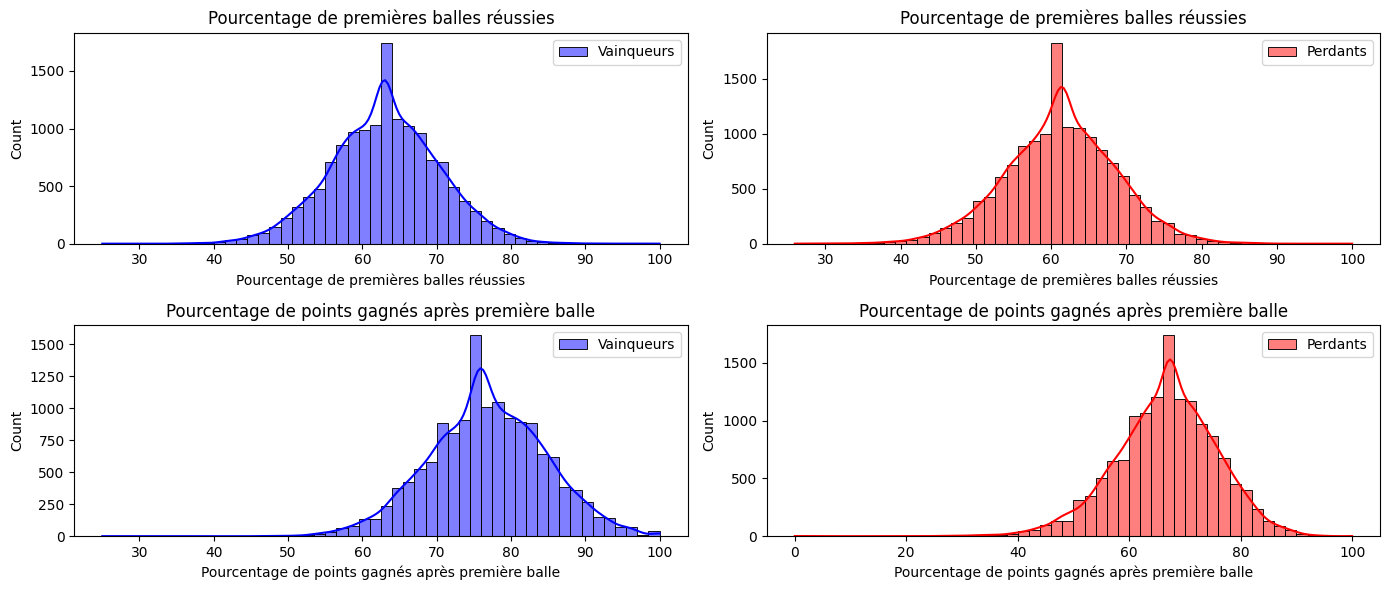

In [27]:
plt.figure(figsize=(14, 6))

# Histogramme pour le pourcentage des premières balles réussies par les vainqueurs
plt.subplot(2, 2, 1)
sns.histplot(data = dfTrain[dfTrain['result'] == 1], x = dfTrain[dfTrain['result'] == 1]['player_1stIn'] / dfTrain[dfTrain['result'] == 1]['player_svpt'] * 100, bins=50, kde=True, color='blue', label='Vainqueurs')
plt.title('Pourcentage de premières balles réussies')
plt.xlabel('Pourcentage de premières balles réussies')
plt.legend()

# Histogramme pour le pourcentage des premières balles réussies par les perdants
plt.subplot(2, 2, 2)
sns.histplot(data = dfTrain[dfTrain['result'] == 0], x = dfTrain[dfTrain['result'] == 0]['player_1stIn'] / dfTrain[dfTrain['result'] == 0]['player_svpt'] * 100, bins=50, kde=True, color='red', label='Perdants')
plt.title('Pourcentage de premières balles réussies')
plt.xlabel('Pourcentage de premières balles réussies')
plt.legend()

# Histogramme pour le pourcentage des points gagnés après première balle par les vainqueurs
plt.subplot(2, 2, 3)
sns.histplot(data = dfTrain[dfTrain['result'] == 1], x = dfTrain[dfTrain['result'] == 1]['player_1stWon'] / dfTrain[dfTrain['result'] == 1]['player_1stIn'] * 100, bins=50, kde=True, color='blue', label='Vainqueurs')
plt.title('Pourcentage de points gagnés après première balle')
plt.xlabel('Pourcentage de points gagnés après première balle')
plt.legend()

# Histogramme pour le pourcentage des points gagnés après première balle par les perdants
plt.subplot(2, 2, 4)
sns.histplot(data = dfTrain[dfTrain['result'] == 0], x = dfTrain[dfTrain['result'] == 0]['player_1stWon'] / dfTrain[dfTrain['result'] == 0]['player_1stIn'] * 100, bins=50, kde=True, color='red', label='Perdants')
plt.title('Pourcentage de points gagnés après première balle')
plt.xlabel('Pourcentage de points gagnés après première balle')
plt.legend()

plt.tight_layout()
plt.show()

# Création du modèle de prédiction